# Example of the use of shape file reader

The example below shows how to read the polyine from a Shapefile

Number of shapes: 2


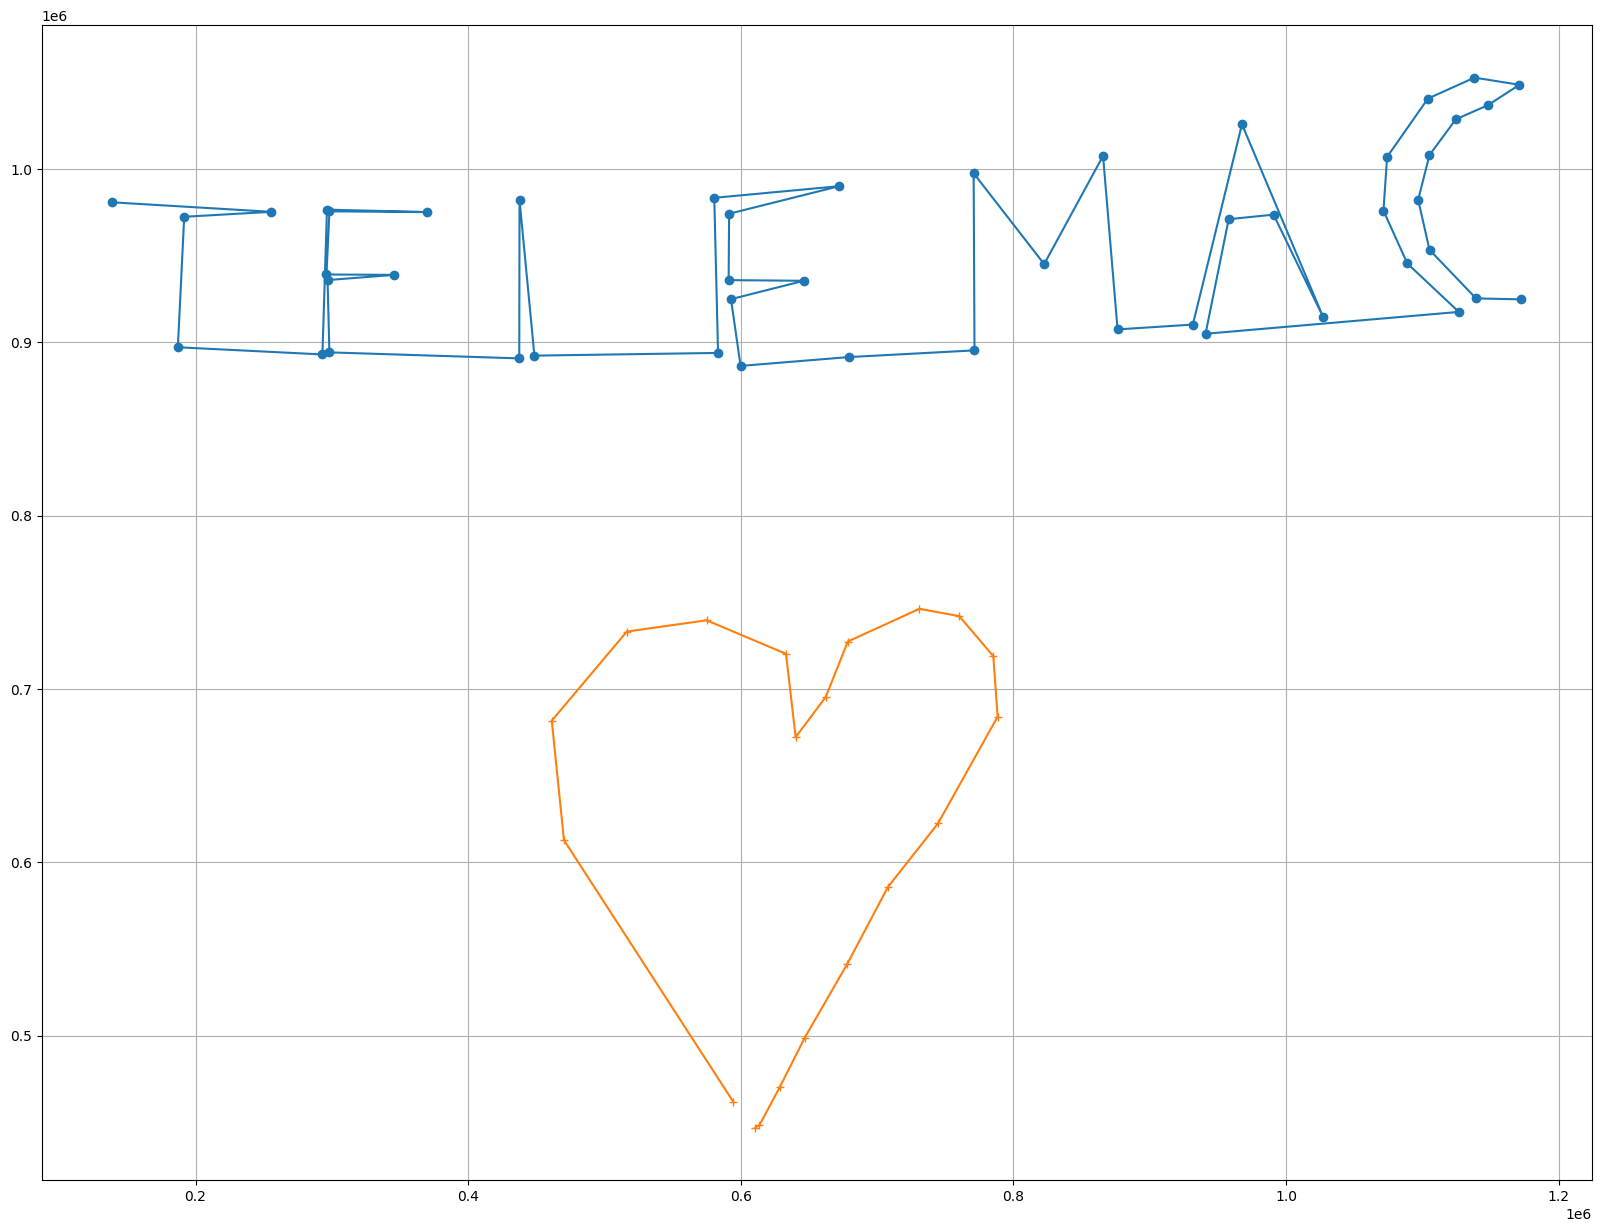

In [1]:
from os import chdir,environ,path
import matplotlib.pyplot as plt
import numpy as np
from data_manip.extraction.shapefile_reader import read_shape_data

shape_file_name = path.join(environ['HOMETEL'], 
                             'notebooks', 
                             'data',
                             'shapefile_example.shp')

# Read the file.shp, be careful file.df is mandatory
my_poly = read_shape_data(shape_file_name)

# my_poly is a list of list containing the (x,y) coordinate
print('Number of shapes: %d' % len(my_poly))

# First polyline
my_poly_1 = np.array(my_poly[0])
x1 = my_poly_1[:,0]  # Get coordinates
y1 = my_poly_1[:,1]

# Second polyline
my_poly_2 = np.array(my_poly[1])  # Get coordinates
x2 = my_poly_2[:,0]
y2 = my_poly_2[:,1]

# Display of the polyline
fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(x1, y1,'o-')
ax.plot(x2, y2,'+-')
ax.grid()

plt.show()

# Conversion from shape to txt (telemac in_poly) or i2s (BlueKenue)

Converting a polygon into a txt format.
You can see exmaples/telemac2d/shapeTXT for and example where that format is used in the FORTRAN FILE.

In [2]:
from data_manip.extraction.shapefile_reader import write_poly_txt

# export the polygon in a txt file.
filename = path.join(environ['HOMETEL'], 
                             'notebooks', 
                             'data',
                             'shapefile_example.txt')

write_poly_txt(my_poly, filename)

with open(filename, 'r') as f:
    print(f.read())

2
49 20 
138826.82356209308 980799.5922808116 
255561.4177002656 975317.6371017536 
191673.93534813012 972454.2664723219 
187013.7876157476 897195.7928298283 
293069.23256008374 893047.9128106972 
296417.0843452018 976567.3712669453 
369716.541124462 975175.269184391 
298217.4507797365 975594.4524038499 
296044.8980009124 939177.7613115162 
345702.82565965754 938941.2995108273 
296853.7681391127 935951.522986522 
298189.2965046593 894247.7481242251 
437489.2507344696 890772.7683697781 
437695.2738958564 982096.9247850245 
448599.20495212043 892363.6126322448 
583324.0668379645 893921.4776393771 
580550.1419140741 983399.0665135747 
672099.5315423005 990093.0525473766 
591449.1823440325 974196.1712655844 
591093.4758978407 935917.740771981 
646235.4345769415 935535.0577508193 
592831.3851390468 924941.2392751081 
599863.3631591323 886437.0413196972 
679243.8008775396 891528.5866066059 
771470.9004068596 895392.1718391208 
770850.0987997871 997542.3246740447 
822596.1546518346 945179.022

Converting a polygon into a i2s format (polygon format for bluekenue)

The i2s format handle setting a value to each polygon you can add the positional argument poly_val (list of npoly value where npoly is the number of polygon in my_poly) to set those values.

In [3]:
from data_manip.extraction.shapefile_reader import write_poly_i2s

# export the file in a i2s file.
filename = path.join(environ['HOMETEL'], 
                             'notebooks', 
                             'data',
                             'shapefile_example.i2s')
write_poly_i2s(my_poly, filename, poly_val=[42., 666.])

with open(filename, 'r') as f:
    print(f.read())

:EndHeader
49 42.0 
138826.82356209308 980799.5922808116 
255561.4177002656 975317.6371017536 
191673.93534813012 972454.2664723219 
187013.7876157476 897195.7928298283 
293069.23256008374 893047.9128106972 
296417.0843452018 976567.3712669453 
369716.541124462 975175.269184391 
298217.4507797365 975594.4524038499 
296044.8980009124 939177.7613115162 
345702.82565965754 938941.2995108273 
296853.7681391127 935951.522986522 
298189.2965046593 894247.7481242251 
437489.2507344696 890772.7683697781 
437695.2738958564 982096.9247850245 
448599.20495212043 892363.6126322448 
583324.0668379645 893921.4776393771 
580550.1419140741 983399.0665135747 
672099.5315423005 990093.0525473766 
591449.1823440325 974196.1712655844 
591093.4758978407 935917.740771981 
646235.4345769415 935535.0577508193 
592831.3851390468 924941.2392751081 
599863.3631591323 886437.0413196972 
679243.8008775396 891528.5866066059 
771470.9004068596 895392.1718391208 
770850.0987997871 997542.3246740447 
822596.1546518346

Those two conversion can also be done in a one line command wit converter.py shp2txt and converter.py shp2i2s.

In [4]:
!converter.py shp2i2s -h

usage: converter.py shp2i2s [-h] [--poly-val POLY_VAL [POLY_VAL ...]]
                            shape_file i2s_file

positional arguments:
  shape_file            path of the shape file.
  i2s_file              path of the i2s file.

optional arguments:
  -h, --help            show this help message and exit
  --poly-val POLY_VAL [POLY_VAL ...]
                        value for each polygon If only one is given it will be
                        applied to all the polygon.


In [5]:
!converter.py shp2txt -h

usage: converter.py shp2txt [-h] shape_file txt_file

positional arguments:
  shape_file  path of the shape file.
  txt_file    path of the txt file.

optional arguments:
  -h, --help  show this help message and exit
